# EDA and Data Cleaning for Room Occupancy and Temperature Estimation
Authors: Alejandro Marchini and Andy Malinsky

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load the data 
ro_data = pd.read_csv('https://archive.ics.uci.edu/static/public/864/data.csv')
ro_data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
# Check for null values
ro_data.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [4]:
# Combine Date and Time columns into a Datetime column
ro_data['Datetime'] = pd.to_datetime(ro_data['Date'] + ' ' + ro_data['Time'])
ro_data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,2017-12-22 10:49:41
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,2017-12-22 10:50:12
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,2017-12-22 10:50:42
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,2017-12-22 10:51:13
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,2017-12-22 10:51:44


In [5]:
# Describe the data
ro_data.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559,2017-12-27 20:27:23.034554112
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000,2017-12-22 10:49:41
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000,2017-12-23 09:14:33
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000,2017-12-24 07:06:45
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000,2017-12-26 04:58:18
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000,2018-01-11 09:00:09
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633,NaN


In [6]:
# See the variables and data types
ro_data.dtypes

Date                            object
Time                            object
S1_Temp                        float64
S2_Temp                        float64
S3_Temp                        float64
S4_Temp                        float64
S1_Light                         int64
S2_Light                         int64
S3_Light                         int64
S4_Light                         int64
S1_Sound                       float64
S2_Sound                       float64
S3_Sound                       float64
S4_Sound                       float64
S5_CO2                           int64
S5_CO2_Slope                   float64
S6_PIR                           int64
S7_PIR                           int64
Room_Occupancy_Count             int64
Datetime                datetime64[ns]
dtype: object

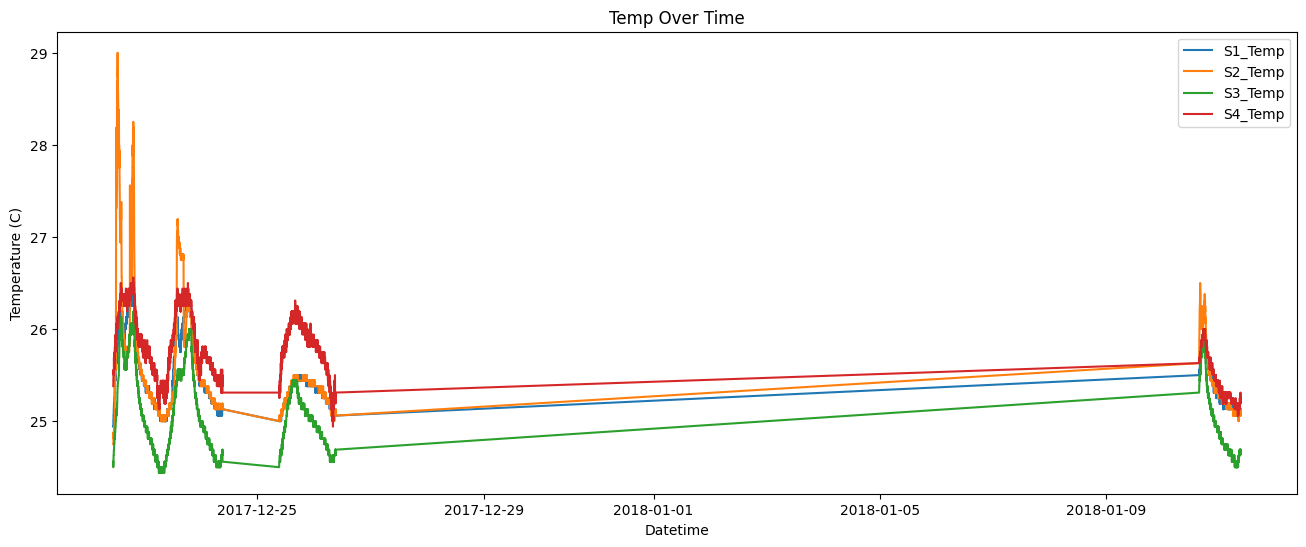

In [7]:
# Visualize temperature readings for each sensor
plt.figure(figsize=(16, 6))
plt.plot(ro_data['Datetime'], ro_data[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']], label=['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp'])
plt.title('Temp Over Time')
plt.xlabel('Datetime')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

In [8]:
# There are gaps in the data where readings were stopped/started, so group them so we can look at them separately
ro_data['time_diff'] = ro_data['Datetime'].diff()
ro_data['is_large_gap'] = ro_data['time_diff'] > pd.Timedelta(hours=1)
ro_data['group'] = ro_data['is_large_gap'].cumsum() + 1

group_1 = ro_data[ro_data['group'] == 1]
group_2 = ro_data[ro_data['group'] == 2]
group_3 = ro_data[ro_data['group'] == 3]

print('Length of group 1: {}'.format(len(group_1)))
print('Length of group 2: {}'.format(len(group_2)))
print('Length of group 3: {}'.format(len(group_3)))

Length of group 1: 5305
Length of group 2: 2779
Length of group 3: 2045


In [9]:
group_1.tail()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime,time_diff,is_large_gap,group
5300,2017/12/24,09:08:47,25.13,25.13,24.69,25.44,7,7,36,24,...,0.07,360,-7.692308e-03,0,0,0,2017-12-24 09:08:47,0 days 00:00:31,False,1
5301,2017/12/24,09:09:18,25.13,25.13,24.69,25.44,7,7,36,24,...,0.07,360,1.153846e-02,0,0,0,2017-12-24 09:09:18,0 days 00:00:31,False,1
5302,2017/12/24,09:09:48,25.13,25.13,24.69,25.50,7,7,36,24,...,0.06,360,3.076923e-02,0,0,0,2017-12-24 09:09:48,0 days 00:00:30,False,1
5303,2017/12/24,09:10:19,25.13,25.13,24.69,25.44,7,7,37,24,...,0.07,360,-2.463364e-17,0,0,0,2017-12-24 09:10:19,0 days 00:00:31,False,1
5304,2017/12/24,09:10:50,25.13,25.13,24.56,25.31,7,7,35,24,...,0.10,355,-8.076923e-02,0,0,0,2017-12-24 09:10:50,0 days 00:00:31,False,1


In [10]:
group_2.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime,time_diff,is_large_gap,group
5305,2017/12/25,09:11:42,25.00,25.00,24.50,25.31,7,7,36,24,...,0.09,355,-0.111538,0,0,0,2017-12-25 09:11:42,1 days 00:00:52,True,2
5306,2017/12/25,09:12:12,25.00,25.06,24.56,25.31,7,7,36,24,...,0.10,355,-0.138462,0,0,0,2017-12-25 09:12:12,0 days 00:00:30,False,2
5307,2017/12/25,09:12:43,25.00,25.00,24.56,25.38,7,7,36,24,...,0.11,355,-0.161538,0,0,0,2017-12-25 09:12:43,0 days 00:00:31,False,2
5308,2017/12/25,09:13:13,25.00,25.00,24.56,25.31,7,7,36,24,...,0.10,355,-0.180769,0,0,0,2017-12-25 09:13:13,0 days 00:00:30,False,2
5309,2017/12/25,09:13:44,25.06,25.00,24.50,25.31,7,7,36,24,...,0.10,355,-0.196154,0,0,0,2017-12-25 09:13:44,0 days 00:00:31,False,2


In [11]:
group_2.tail()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime,time_diff,is_large_gap,group
8079,2017/12/26,09:07:58,25.06,25.06,24.69,25.25,6,7,34,22,...,0.10,350,0.0,0,0,0,2017-12-26 09:07:58,0 days 00:00:31,False,2
8080,2017/12/26,09:08:29,25.06,25.06,24.69,25.25,6,7,34,22,...,0.09,350,0.0,0,0,0,2017-12-26 09:08:29,0 days 00:00:31,False,2
8081,2017/12/26,09:08:59,25.06,25.06,24.69,25.25,6,7,34,22,...,0.10,350,0.0,0,0,0,2017-12-26 09:08:59,0 days 00:00:30,False,2
8082,2017/12/26,09:09:30,25.06,25.06,24.63,25.25,6,7,34,22,...,0.09,350,0.0,0,0,0,2017-12-26 09:09:30,0 days 00:00:31,False,2
8083,2017/12/26,09:10:01,25.06,25.06,24.69,25.31,6,7,34,22,...,0.11,350,0.0,0,0,0,2017-12-26 09:10:01,0 days 00:00:31,False,2


In [12]:
group_3.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime,time_diff,is_large_gap,group
8084,2018/01/10,15:25:48,25.5,25.63,25.31,25.63,10,11,56,35,...,0.24,370,0.184615,1,1,3,2018-01-10 15:25:48,15 days 06:15:47,True,3
8085,2018/01/10,15:26:19,25.5,25.63,25.31,25.63,10,12,56,35,...,0.09,370,0.353846,0,1,3,2018-01-10 15:26:19,0 days 00:00:31,False,3
8086,2018/01/10,15:26:49,25.5,25.69,25.38,25.69,10,12,56,36,...,0.08,370,0.507692,0,0,3,2018-01-10 15:26:49,0 days 00:00:30,False,3
8087,2018/01/10,15:27:20,25.5,25.69,25.38,25.63,10,12,57,36,...,0.09,370,0.646154,0,1,3,2018-01-10 15:27:20,0 days 00:00:31,False,3
8088,2018/01/10,15:27:51,25.5,25.69,25.31,25.63,10,11,57,36,...,0.09,370,0.769231,1,0,3,2018-01-10 15:27:51,0 days 00:00:31,False,3


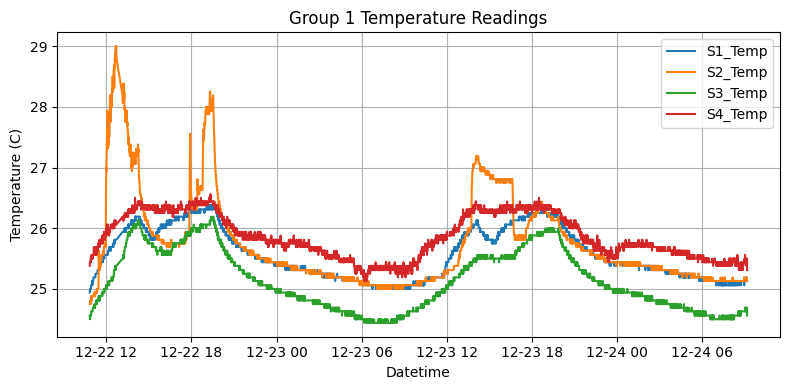

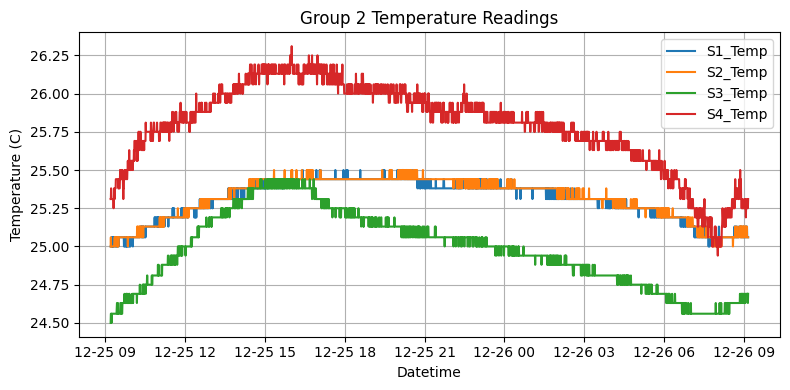

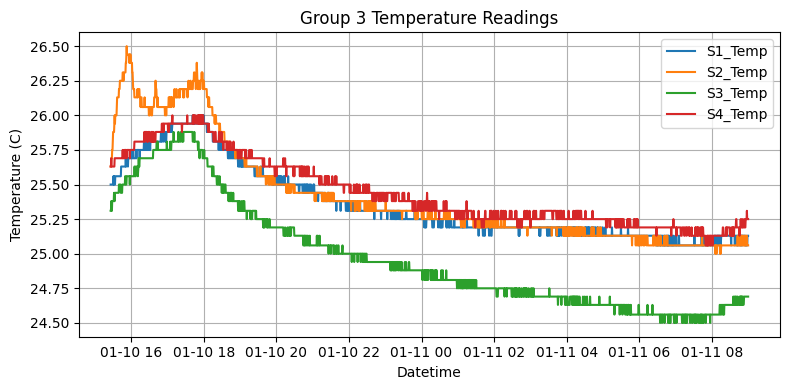

In [13]:
groups = [group_1, group_2, group_3]

# Visualize Temperature for each group of readings
for i, group in enumerate(groups):
    plt.figure(figsize=(8, 4))
    plt.plot(group['Datetime'], group[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']], label=['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp'])
    plt.title(f'Group {i+1} Temperature Readings')
    plt.xlabel('Datetime')
    plt.ylabel('Temperature (C)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

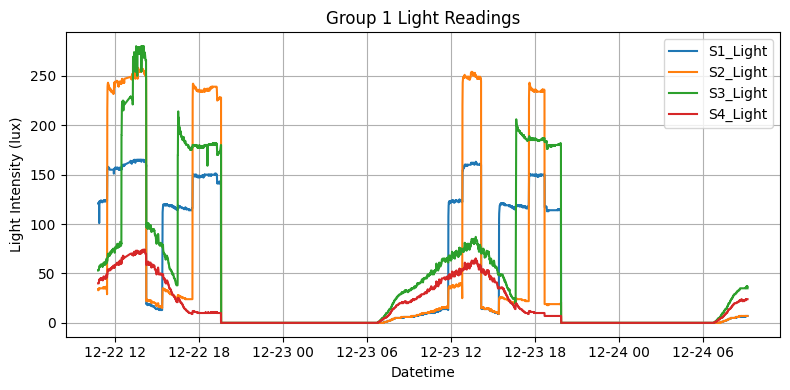

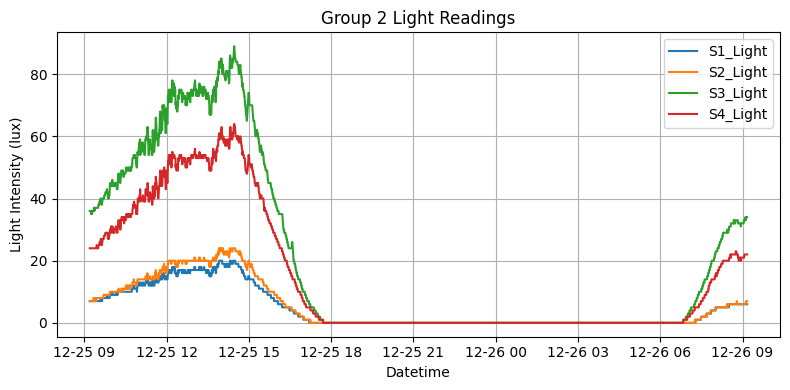

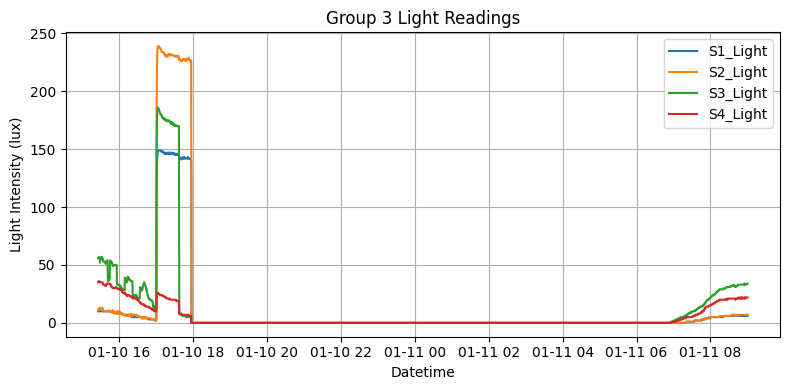

In [14]:
# Visualize light readings
for i, group in enumerate(groups):
    plt.figure(figsize=(8, 4))
    plt.plot(group['Datetime'], group[['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']], label=['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light'])
    plt.title(f'Group {i+1} Light Readings')
    plt.xlabel('Datetime')
    plt.ylabel('Light Intensity (lux)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

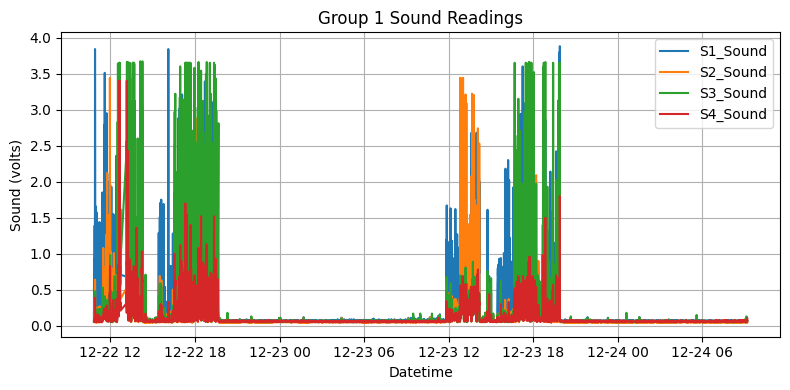

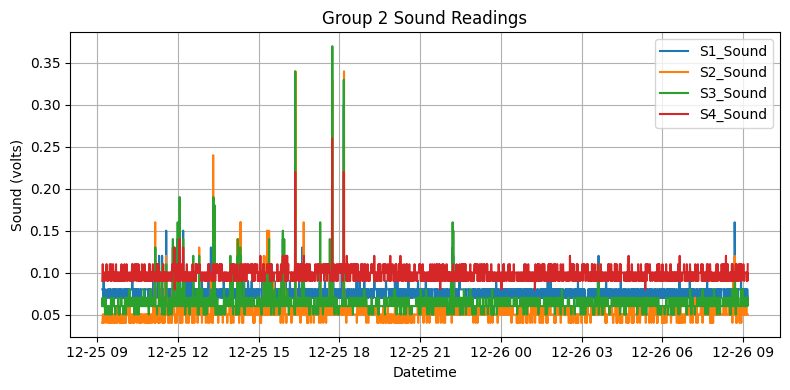

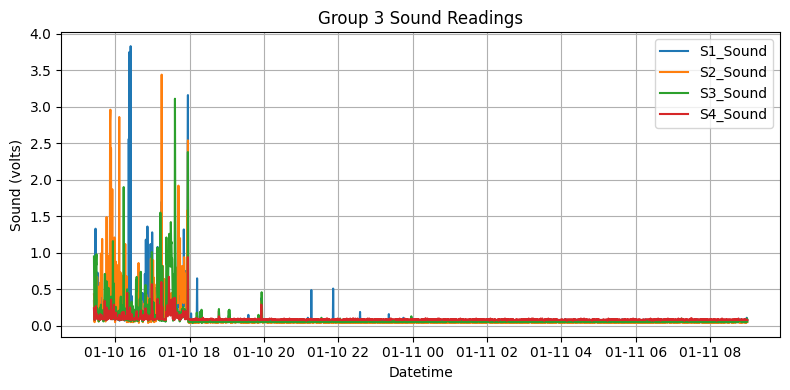

In [15]:
# Visualize sound readings
for i, group in enumerate(groups):
    plt.figure(figsize=(8, 4))
    plt.plot(group['Datetime'], group[['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']], label=['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound'])
    plt.title(f'Group {i+1} Sound Readings')
    plt.xlabel('Datetime')
    plt.ylabel('Sound (volts)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

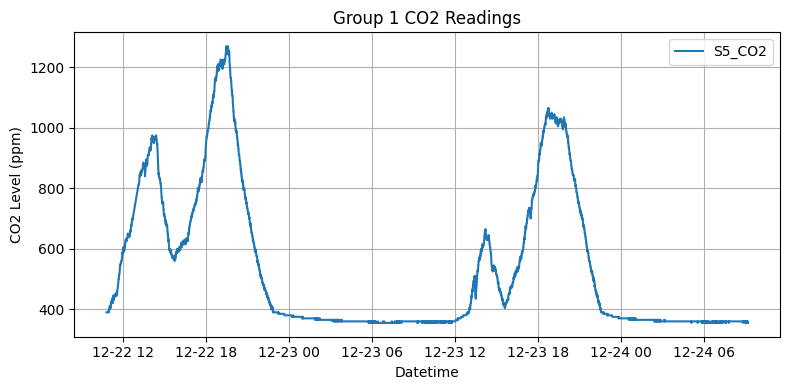

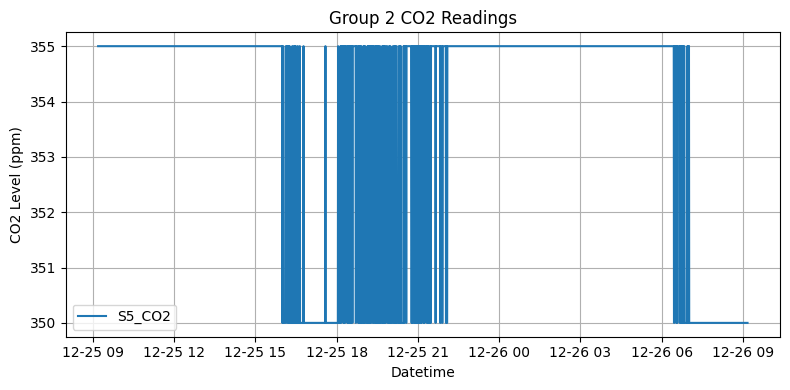

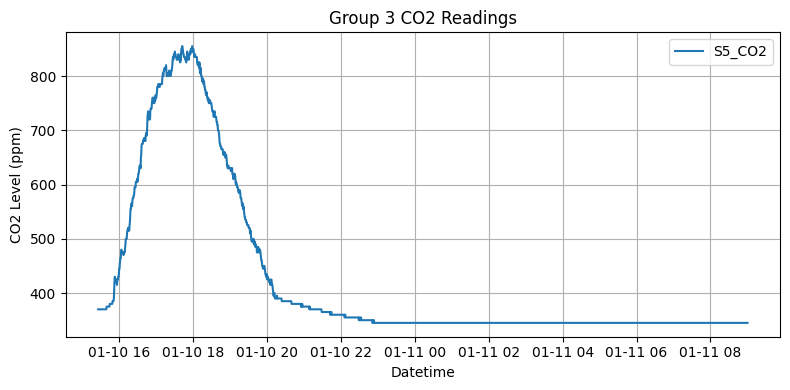

In [16]:
# Visualize CO2 readings
for i, group in enumerate(groups):
    plt.figure(figsize=(8, 4))
    plt.plot(group['Datetime'], group[['S5_CO2']], label=['S5_CO2'])
    plt.title(f'Group {i+1} CO2 Readings')
    plt.xlabel('Datetime')
    plt.ylabel('CO2 Level (ppm)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

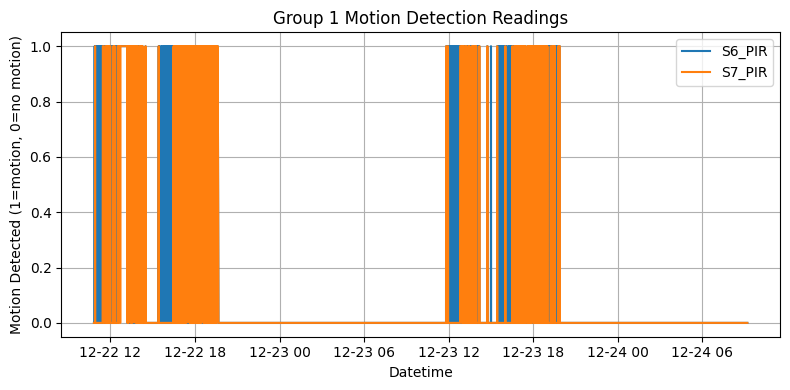

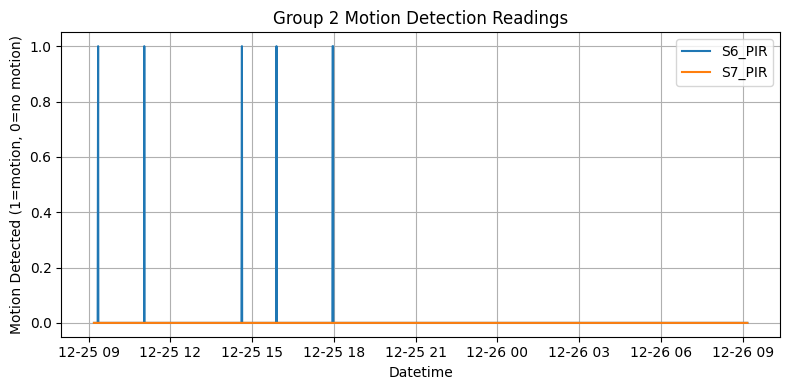

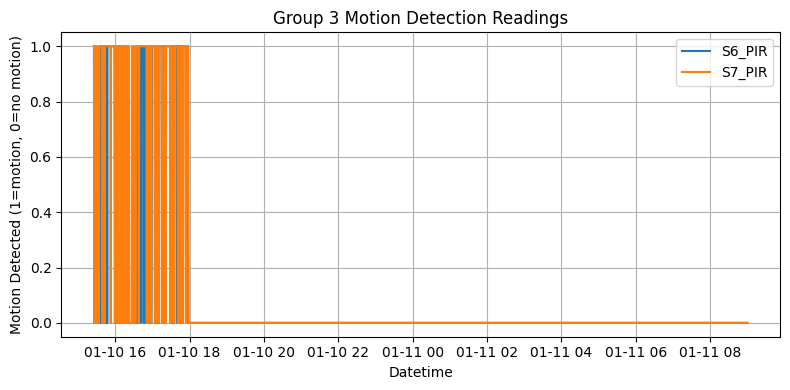

In [17]:
# Visualize motion detection
for i, group in enumerate(groups):
    plt.figure(figsize=(8, 4))
    plt.plot(group['Datetime'], group[['S6_PIR', 'S7_PIR']], label=['S6_PIR', 'S7_PIR'])
    plt.title(f'Group {i+1} Motion Detection Readings')
    plt.xlabel('Datetime')
    plt.ylabel('Motion Detected (1=motion, 0=no motion)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

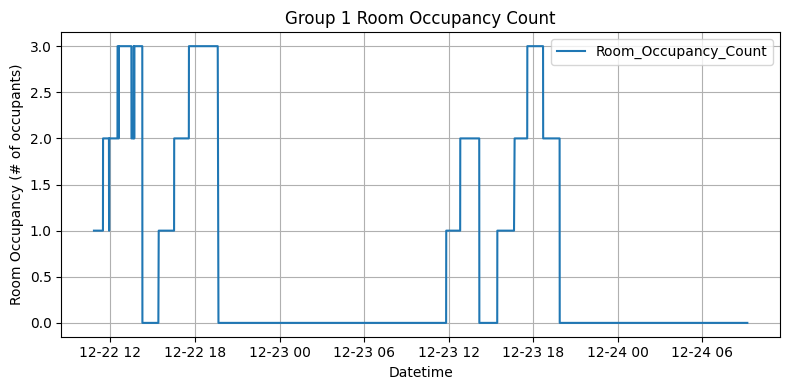

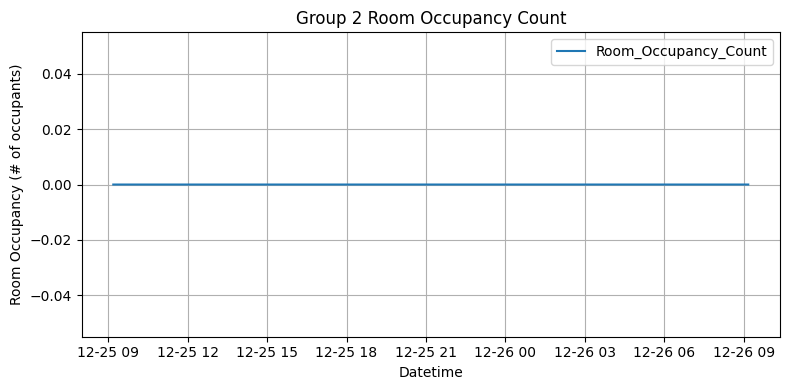

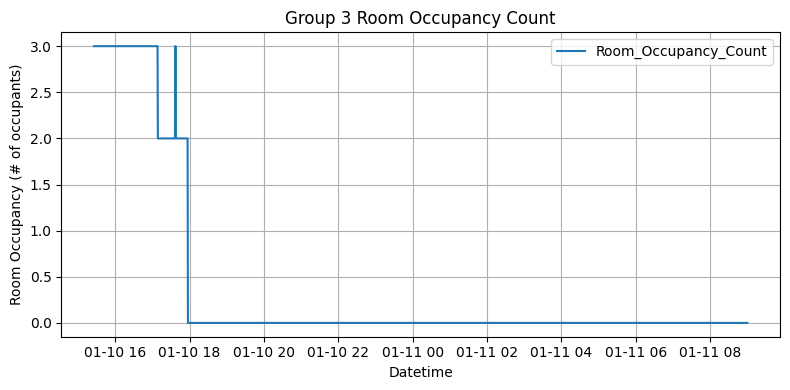

In [18]:
# Visualize room occupancy
for i, group in enumerate(groups):
    plt.figure(figsize=(8, 4))
    plt.plot(group['Datetime'], group[['Room_Occupancy_Count']], label=['Room_Occupancy_Count'])
    plt.title(f'Group {i+1} Room Occupancy Count')
    plt.xlabel('Datetime')
    plt.ylabel('Room Occupancy (# of occupants)')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

## Data Covariance and Correlation

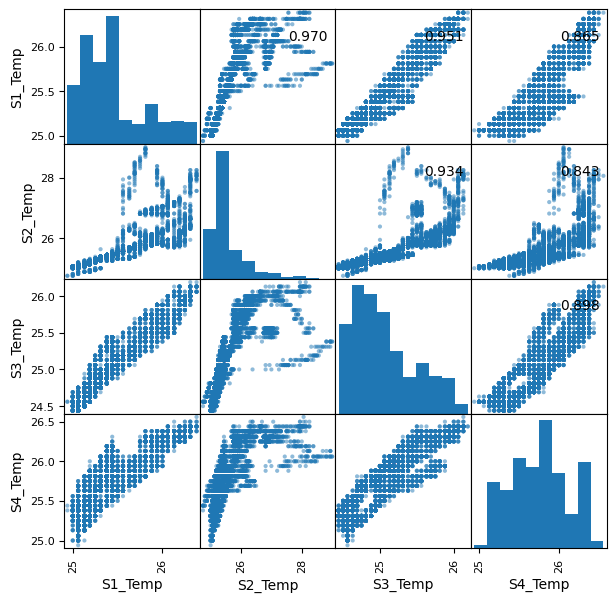

In [19]:
# Temp Sensor Correlations
select_columns = ['S1_Temp', 'S2_Temp',	'S3_Temp', 'S4_Temp']
axes = pd.plotting.scatter_matrix(ro_data[select_columns], alpha=0.5, figsize=[7,7])
corr = ro_data[select_columns].corr(method='spearman').to_numpy() # nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

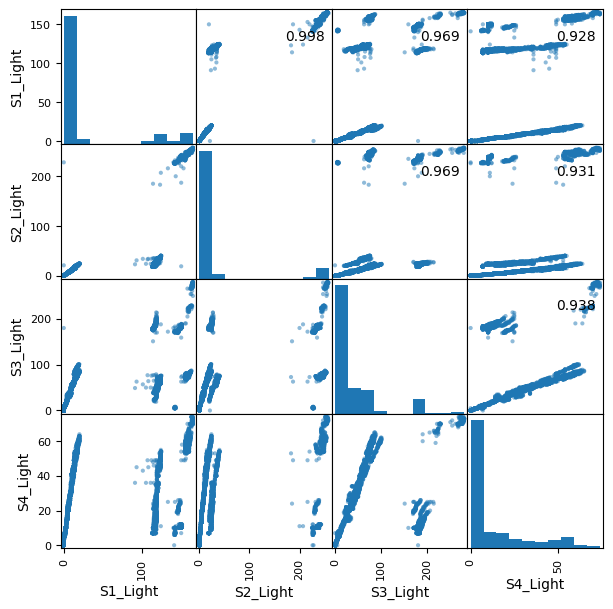

In [20]:
# Light Sensor Correlations
select_columns = ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']
axes = pd.plotting.scatter_matrix(ro_data[select_columns], alpha=0.5, figsize=[7,7])
corr = ro_data[select_columns].corr(method='spearman').to_numpy() # nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

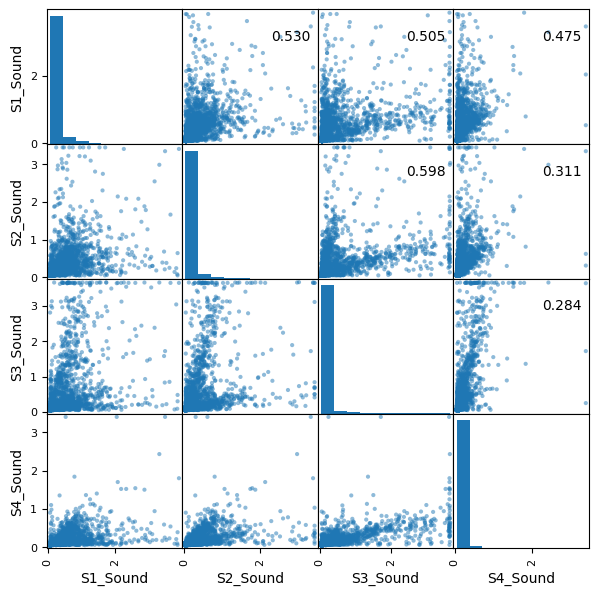

In [21]:
# Sound Sensor Correlations
select_columns = ['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']
axes = pd.plotting.scatter_matrix(ro_data[select_columns], alpha=0.5, figsize=[7,7])
corr = ro_data[select_columns].corr(method='spearman').to_numpy() # nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

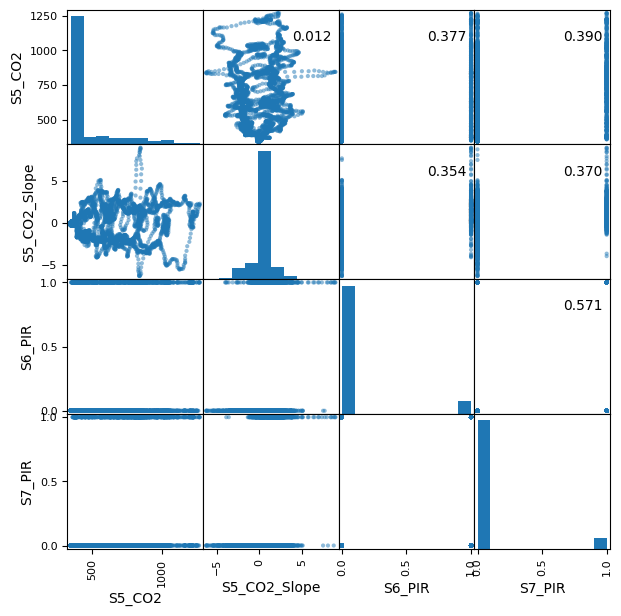

In [22]:
# CO2 and PIR Correlations
select_columns = ['S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']
axes = pd.plotting.scatter_matrix(ro_data[select_columns], alpha=0.5, figsize=[7,7])
corr = ro_data[select_columns].corr(method='spearman').to_numpy() # nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [23]:
# Individual Correlations with Room_Occupancy_Count
select_columns = [
    'S1_Temp', 'S2_Temp',	'S3_Temp', 'S4_Temp',
    'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light',
    'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
    'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
    'Room_Occupancy_Count'
]
correlations = ro_data[select_columns].corr(method='spearman')['Room_Occupancy_Count']
corr_df = pd.DataFrame(correlations)
corr_df = corr_df.rename(columns={'Room_Occupancy_Count': 'Room_Occupancy_Count Correlation'})
corr_df

,Room_Occupancy_Count Correlation
S1_Temp,0.588967
S2_Temp,0.547282
S3_Temp,0.558498
S4_Temp,0.528401
S1_Light,0.719052
S2_Light,0.713250
S3_Light,0.662057
S4_Light,0.499039
S1_Sound,0.639194
S2_Sound,0.674546


The temperature sensor variables are all highly correlated, and the light sensor variables are all highly correlated with each other. There was no strong correlation between the four sound sensor variables, or between the CO2 and PIR sensor variables. From the spearman correlation metrics for each variable compared to Room_Occupancy_Count, we can filter for the most correlated temperature and light sensors. S1_Temp and S1_Light have the highest correlation with Room_Occupancy_Count, so we leave those variables to represent those sensors in the model.

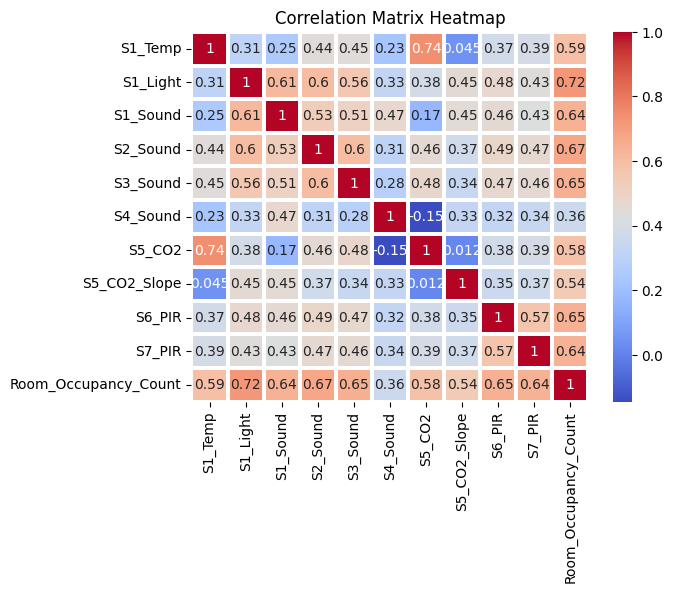

In [24]:
# Correlation Matrix Heatmap with filtered variables
filtered_columns = [
    'S1_Temp', 'S1_Light', 
    'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
    'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
    'Room_Occupancy_Count'
]
corr = ro_data[filtered_columns].corr(method='spearman') # nonlinear
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=1.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
# Serialize cleaned data for use in other notebooks
ro_data.to_pickle("ro_data.pkl")